# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [43]:

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp[0],
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nemuro
Processing Record 2 of Set 1 | san patricio
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | jijiga
Processing Record 6 of Set 1 | gat
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | vila franca do campo
Processing Record 9 of Set 1 | halalo
City not found. Skipping...
Processing Record 10 of Set 1 | luanda
Processing Record 11 of Set 1 | nelson bay
Processing Record 12 of Set 1 | tuatapere
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | wao
Processing Record 16 of Set 1 | tuggurt
City not found. Skipping...
Processing Record 17 of Set 1 | cidreira
Processing Record 18 of Set 1 | bandar-e lengeh
Processing Record 19 of Set 1 | brodokalmak
Processing Record 20 of Set 1 | los llanos de aridane
Processing Record 21 of Set 1 | port macquarie
P

In [46]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [47]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nemuro,43.3236,145.5750,264.25,75,51,1.61,JP,1675459617
1,san patricio,28.0170,-97.5169,288.80,55,5,3.40,US,1675459617
2,busselton,-33.6500,115.3333,292.51,60,0,5.72,AU,1675459618
3,jamestown,42.0970,-79.2353,260.77,84,100,9.26,US,1675459385
4,jijiga,9.3500,42.8000,289.90,65,8,4.81,ET,1675459618


In [48]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [4]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nemuro,43.3236,145.5750,264.25,75,51,1.61,JP,1675459617
1,san patricio,28.0170,-97.5169,288.80,55,5,3.40,US,1675459617
2,busselton,-33.6500,115.3333,292.51,60,0,5.72,AU,1675459618
3,jamestown,42.0970,-79.2353,260.77,84,100,9.26,US,1675459385
4,jijiga,9.3500,42.8000,289.90,65,8,4.81,ET,1675459618


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

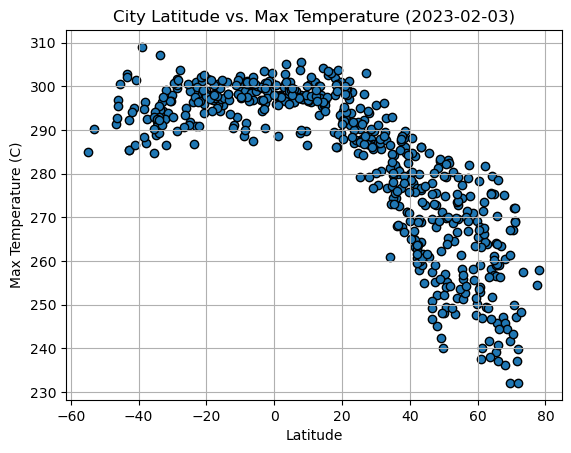

In [5]:
#today = time.strftime("%Y-%m-%d", time.gmtime())

import os.path
#last modified time of csv file
lastrun = (time.ctime(os.path.getmtime("output_data/cities.csv")))
lastrun = time.strftime("%Y-%m-%d", time.strptime(lastrun))
lastrun 


# Build scatter plot for latitude vs. temperature



plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], marker="o", edgecolors="black")


# Incorporate the other graph properties
plt.grid(visible=True)
plt.title("City Latitude vs. Max Temperature " + ( "(" + lastrun + ")" )) 
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

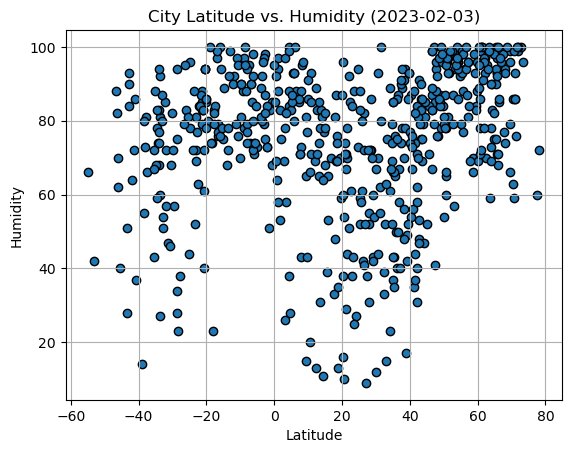

In [16]:

# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.grid(visible=True)
plt.title(f"City Latitude vs. Humidity ({lastrun})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

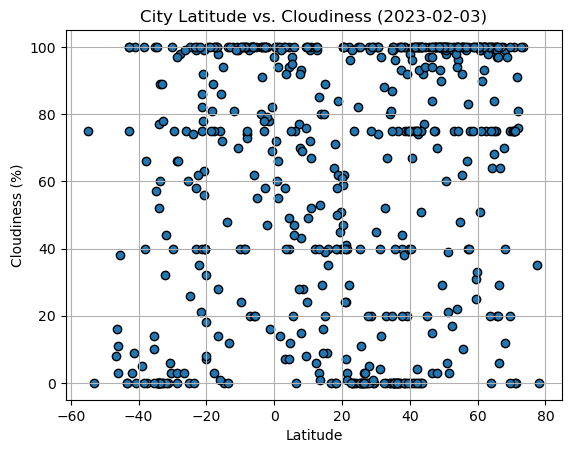

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.grid(visible=True)
plt.title("City Latitude vs. Cloudiness "+ ( "(" + lastrun + ")" ))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

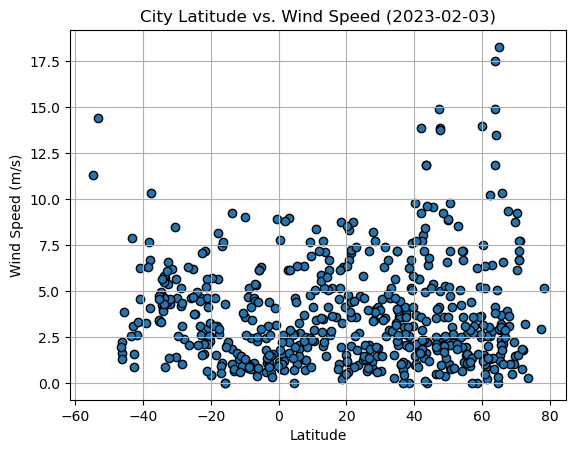

In [9]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.grid(visible=True)
plt.title("City Latitude vs. Wind Speed "+ ( "(" + lastrun + ")" ))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [88]:
# Define a function to create Linear Regression plots
def LRP(chosenDf='', chosenYl='', xylim=''):
    x = chosenDf['Lat']
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,chosenDf[chosenYl])
    regress_values = x * slope + intercept
    return plt.scatter(x,chosenDf[chosenYl]), plt.plot(x,regress_values,"r-"),plt.xlabel("Latitude"), plt.ylabel(chosenYl), print(f"The r-value is: {rvalue}"), plt.annotate(f"y = {round(slope, 2)} x + {round(intercept, 2)}",(xylim),fontsize=15,color="red"), plt.show()

                


In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nemuro,43.3236,145.5750,264.25,75,51,1.61,JP,1675459617
1,san patricio,28.0170,-97.5169,288.80,55,5,3.40,US,1675459617
3,jamestown,42.0970,-79.2353,260.77,84,100,9.26,US,1675459385
4,jijiga,9.3500,42.8000,289.90,65,8,4.81,ET,1675459618
5,gat,31.6100,34.7642,285.59,100,14,2.56,IL,1675459445


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,busselton,-33.6500,115.3333,292.51,60,0,5.72,AU,1675459618
6,port alfred,-33.5906,26.8910,293.25,92,60,0.89,ZA,1675459619
8,luanda,-8.8368,13.2343,300.15,78,40,5.14,AO,1675459620
9,nelson bay,-32.7167,152.1500,294.32,51,0,5.36,AU,1675459621
10,tuatapere,-46.1333,167.6833,296.79,62,3,2.23,NZ,1675459532


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.845007401084978


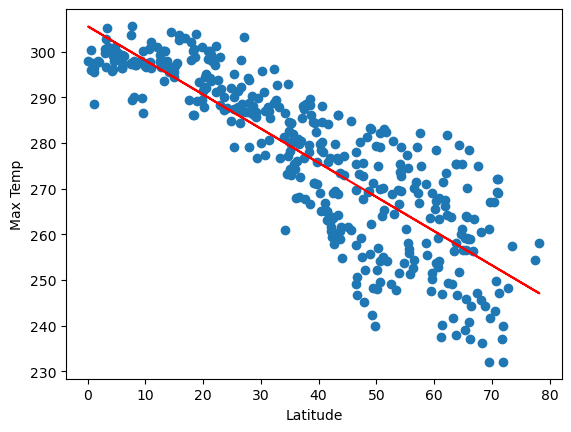

(<matplotlib.collections.PathCollection at 0x7f6c9d801180>,
 Text(0.5, 24.0, 'Latitude'),
 Text(24.000000000000007, 0.5, 'Max Temp'),
 None,
 Text(9, -9, 'y = -0.75 x + 305.58'),
 None)

In [89]:
# Linear regression on Northern Hemisphere
LRP(northern_hemi_df, 'Max Temp', (9,-9))

#plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp']), plt.xlabel("Latitude"), plt.ylabel('Max Temp')

The r-value is: 0.3889826670831006


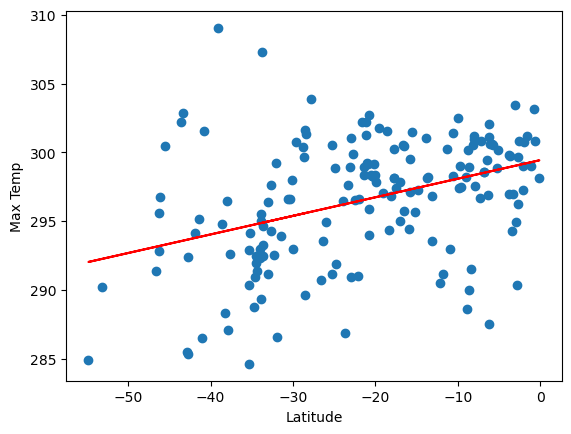

(<matplotlib.collections.PathCollection at 0x7f6c9dabae90>,
 Text(0.5, 24.0, 'Latitude'),
 Text(24.000000000000007, 0.5, 'Max Temp'),
 None,
 Text(-35, 35, 'y = 0.14 x + 299.45'),
 None)

In [90]:
# Linear regression on Southern Hemisphere
LRP(southern_hemi_df, 'Max Temp', (-35,35))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.34575085322100846


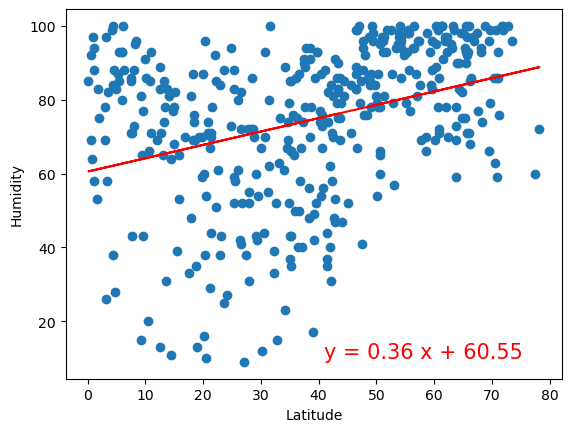

(<matplotlib.collections.PathCollection at 0x7f6c9dbc7760>,
 Text(0.5, 24.0, 'Latitude'),
 Text(24.000000000000007, 0.5, 'Humidity'),
 None,
 Text(41, 10, 'y = 0.36 x + 60.55'),
 None)

In [91]:
# Northern Hemisphere
LRP(northern_hemi_df, 'Humidity', (41,10))

The r-value is: 0.4051273794292108


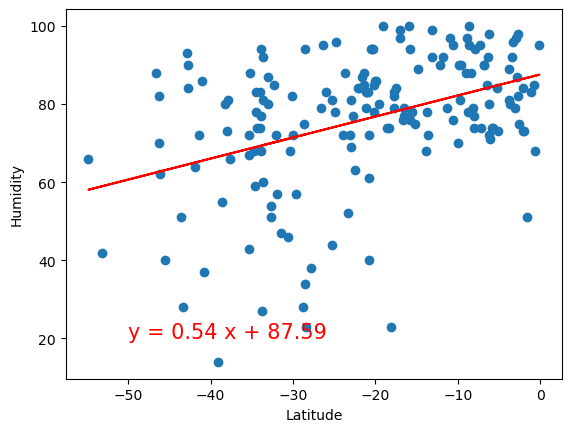

(<matplotlib.collections.PathCollection at 0x7f6c9db8d480>,
 Text(0.5, 24.0, 'Latitude'),
 Text(24.000000000000007, 0.5, 'Humidity'),
 None,
 Text(-50, 20, 'y = 0.54 x + 87.59'),
 None)

In [92]:
# Southern Hemisphere
LRP(southern_hemi_df, 'Humidity', (-50,20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2325632898376249


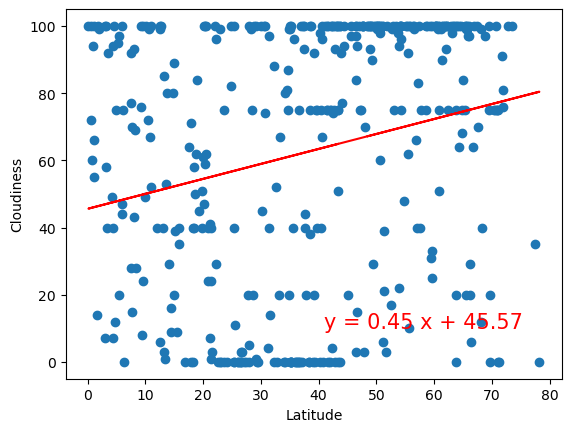

(<matplotlib.collections.PathCollection at 0x7f6c9d2e8f70>,
 Text(0.5, 24.0, 'Latitude'),
 Text(24.000000000000007, 0.5, 'Cloudiness'),
 None,
 Text(41, 10, 'y = 0.45 x + 45.57'),
 None)

In [93]:
# Northern Hemisphere
LRP(northern_hemi_df, 'Cloudiness', (41,10))

The r-value is: 0.4494713635400935


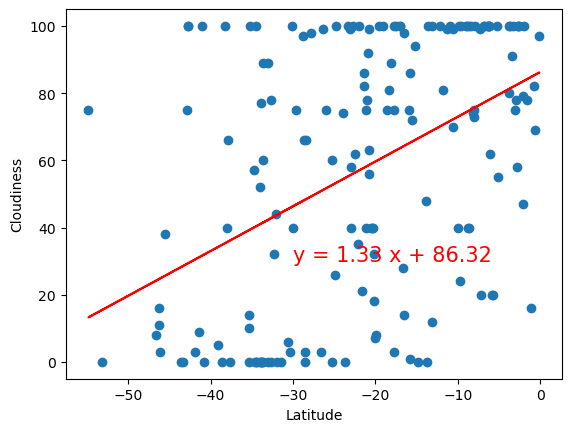

(<matplotlib.collections.PathCollection at 0x7f6c9dbbedd0>,
 Text(0.5, 24.0, 'Latitude'),
 Text(24.000000000000007, 0.5, 'Cloudiness'),
 None,
 Text(-30, 30, 'y = 1.33 x + 86.32'),
 None)

In [96]:
# Southern Hemisphere
LRP(southern_hemi_df, 'Cloudiness', (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.07385889526299375


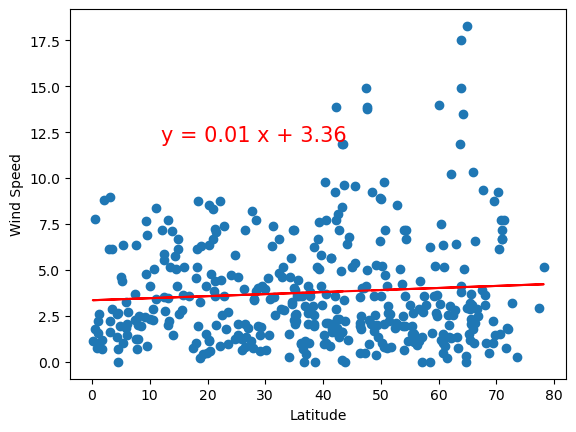

(<matplotlib.collections.PathCollection at 0x7f6c9d80e110>,
 Text(0.5, 24.0, 'Latitude'),
 Text(24.000000000000007, 0.5, 'Wind Speed'),
 None,
 Text(12, 12, 'y = 0.01 x + 3.36'),
 None)

In [97]:
# Northern Hemisphere
LRP(northern_hemi_df, 'Wind Speed', (12,12))

The r-value is: -0.34480304490676383


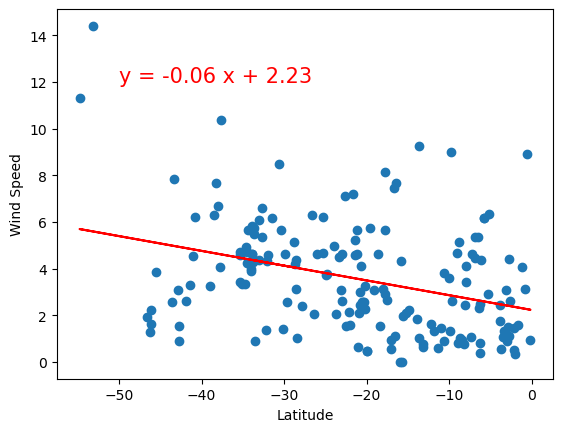

(<matplotlib.collections.PathCollection at 0x7f6c9cccc310>,
 Text(0.5, 24.0, 'Latitude'),
 Text(24.000000000000007, 0.5, 'Wind Speed'),
 None,
 Text(-50, 12, 'y = -0.06 x + 2.23'),
 None)

In [98]:
# Southern Hemisphere
LRP(southern_hemi_df, 'Wind Speed', (-50,12))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
Further equator closer equator